<a href="https://colab.research.google.com/github/Ananya-Sharma1102/EYMLCODE/blob/main/EY_MLCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No missing values found!
Random Forest Accuracy: 0.60
Gradient Boosting Accuracy: 0.40

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.33      0.33      0.33         5
weighted avg       0.60      0.60      0.60         5


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.22      0.22      0.22         5
weighted avg       0.40      0.40      0.40         5



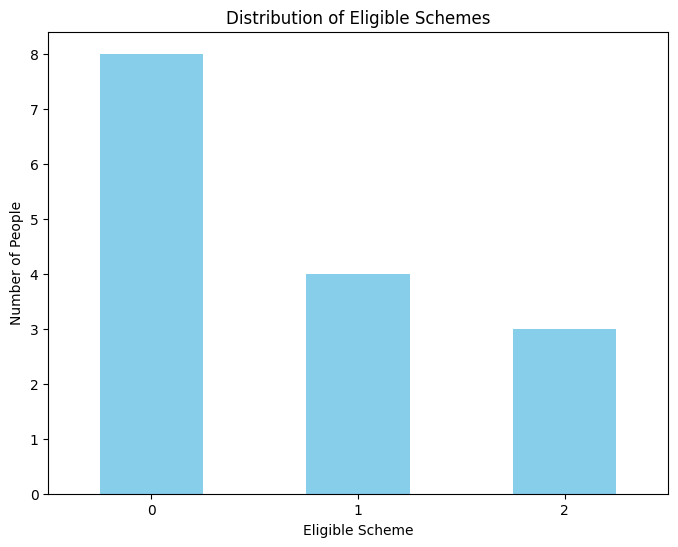

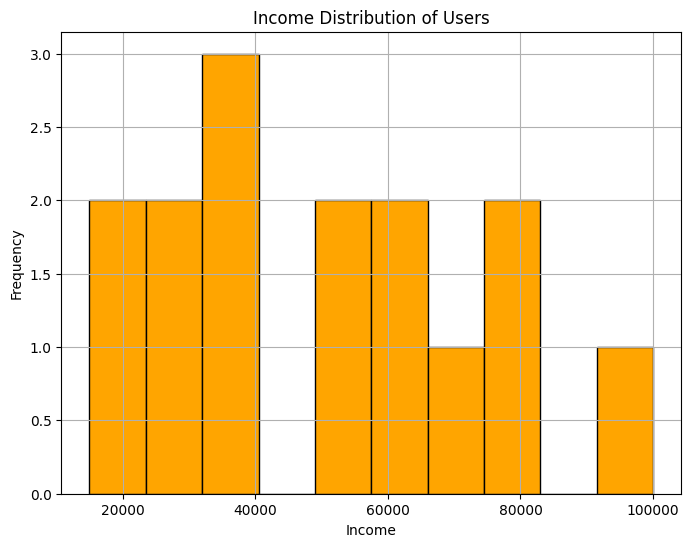

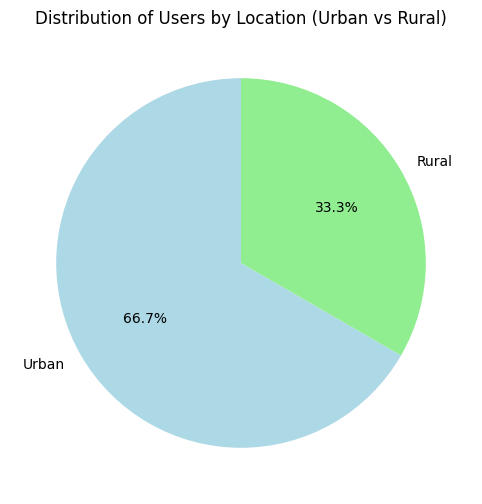

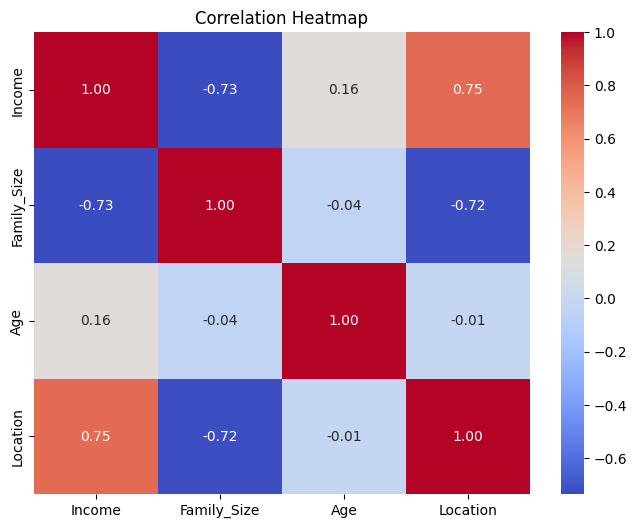

<ipython-input-1-ae4e6d86f87a>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Eligible_Scheme', y='Income', data=df, palette="Set2")


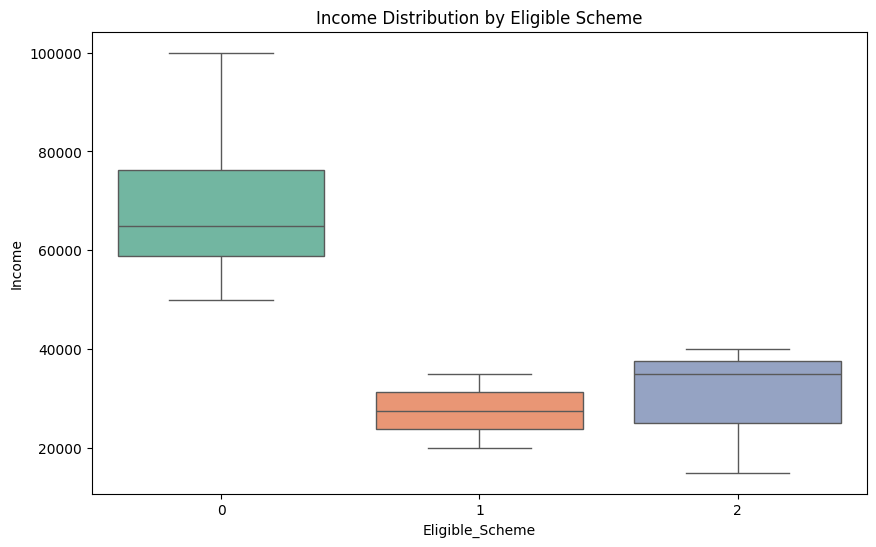

<ipython-input-1-ae4e6d86f87a>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Eligible_Scheme', y='Age', data=df, palette="Set3")


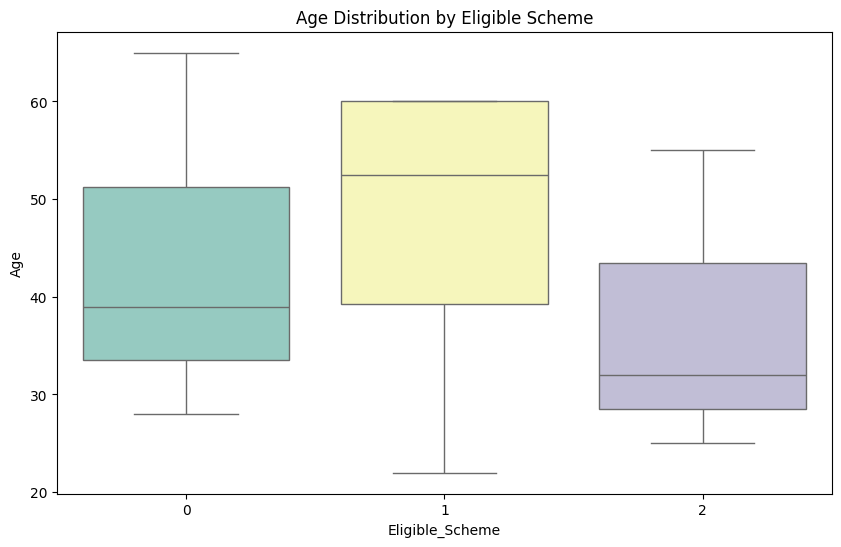


Recommended Scheme (Random Forest): Scheme_C
Recommended Scheme (Gradient Boosting): Scheme_C


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hardcoded synthetic data representing different users' information
data = {
    'Income': [50000, 30000, 40000, 25000, 60000, 80000, 35000, 70000, 20000, 55000, 100000, 15000, 75000, 35000, 60000],
    'Family_Size': [4, 5, 3, 6, 2, 4, 3, 3, 7, 4, 2, 6, 3, 4, 2],
    'Age': [35, 60, 25, 45, 28, 50, 32, 40, 22, 38, 65, 55, 29, 60, 55],
    'Location': ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Urban', 'Urban'],
    'Eligible_Scheme': ['Scheme_A', 'Scheme_B', 'Scheme_C', 'Scheme_B', 'Scheme_A', 'Scheme_A', 'Scheme_C', 'Scheme_A', 'Scheme_B', 'Scheme_A', 'Scheme_A', 'Scheme_C', 'Scheme_A', 'Scheme_B', 'Scheme_A']
}

# Creating a DataFrame from the hardcoded data
df = pd.DataFrame(data)

# Feature Engineering: Encoding categorical data (Location and Eligible_Scheme)
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_scheme = LabelEncoder()
df['Eligible_Scheme'] = le_scheme.fit_transform(df['Eligible_Scheme'])

# Checking for any missing values in the dataset
if df.isnull().any().any():
    print("Missing values detected!")
else:
    print("No missing values found!")

# Splitting data into training and test sets
X = df.drop('Eligible_Scheme', axis=1)
y = df['Eligible_Scheme']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Model 2: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluating Models: Accuracy and classification report
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Printing out the accuracies for both models
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))

# Now let's generate some useful visualizations to understand the data and results

# 1. **Bar Graph**: Showing the distribution of schemes
plt.figure(figsize=(8,6))
scheme_counts = df['Eligible_Scheme'].value_counts()
scheme_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Eligible Schemes')
plt.xlabel('Eligible Scheme')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

# 2. **Histogram**: Showing the distribution of user income
plt.figure(figsize=(8,6))
df['Income'].plot(kind='hist', bins=10, color='orange', edgecolor='black')
plt.title('Income Distribution of Users')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. **Pie Chart**: Showing the distribution of user locations (Urban vs Rural)
location_counts = df['Location'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(location_counts, labels=le_location.inverse_transform(location_counts.index), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Users by Location (Urban vs Rural)')
plt.show()

# 4. **Heatmap**: Visualizing the correlation between features
plt.figure(figsize=(8,6))
correlation_matrix = df[['Income', 'Family_Size', 'Age', 'Location']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 5. **Boxplot**: Showing the distribution of income by eligible scheme
plt.figure(figsize=(10,6))
sns.boxplot(x='Eligible_Scheme', y='Income', data=df, palette="Set2")
plt.title('Income Distribution by Eligible Scheme')
plt.show()

# 6. **Boxplot**: Showing the distribution of age by eligible scheme
plt.figure(figsize=(10,6))
sns.boxplot(x='Eligible_Scheme', y='Age', data=df, palette="Set3")
plt.title('Age Distribution by Eligible Scheme')
plt.show()

# Let's make a prediction for a new user profile using both models
user_profile = pd.DataFrame({
    'Income': [45000],
    'Family_Size': [3],
    'Age': [30],
    'Location': [le_location.transform(['Urban'])[0]]  # Encoding location as 'Urban'
})

# Predict the eligible scheme for this user using Random Forest and Gradient Boosting models
rf_user_pred = rf_model.predict(user_profile)
gb_user_pred = gb_model.predict(user_profile)

# Convert the predictions back to the scheme names
rf_recommended_scheme = le_scheme.inverse_transform(rf_user_pred)[0]
gb_recommended_scheme = le_scheme.inverse_transform(gb_user_pred)[0]

# Output the recommended schemes
print("\nRecommended Scheme (Random Forest):", rf_recommended_scheme)
print("Recommended Scheme (Gradient Boosting):", gb_recommended_scheme)
